# 1. Понимание бизнеса

## 1.1 Цель
Предсказать оценку вина

## 1.2 Описание
Данные были загружены из репозитория машинного обучения UCI.

Набор данных о красном и белом португальском винпе"Винью Верде" (подробнее см. ссылку [Cortez et al., 2009]). Доступна информация о физико-химических свойствах. 

[Описание от Kaggle] https://www.kaggle.com/rajyellow46/wine-quality

# 2. Data Understanding

## 2.1 Import Libraries

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor

# Modelling Helpers
from sklearn.preprocessing import  Normalizer , scale
from sklearn.model_selection import train_test_split , StratifiedKFold
from sklearn.preprocessing import LabelEncoder

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

## 2.2 Вспомогательные функции

In [19]:
def plot_correlation_map( df ):
    corr = wine.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )
    
def plot_variable_importance( X , y ):
    tree = DecisionTreeClassifier( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )
    
    
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))
    

## 2.3 Загрузка данных

In [3]:
wine = pd.read_csv("winequalityN.csv")
wine.shape

(6497, 13)

## 2.4 Статистика и визуализации

In [4]:
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


##**Описание переменных**
 - type: тип вина
 - fixed acidity: фиксированная кислотность
 - volatile acidity: летучая кислотность 
 - citric acid: лимонная кислота
 - residual sugar: остаточный сахар
 - chlorides: хлориды
 - free sulfur dioxide: свободный диоксид серы
 - total sulfur dioxide: общий диоксид серы 
 - density: плотность 
 - pH: кислотность  
 - sulphates: сульфаты 
 - alcohol: крепость вина
 - quality (score between 0 and 10): оценка (от 0 до 10)

In [6]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### 2.4.2 Рассмотрим распределения признаков

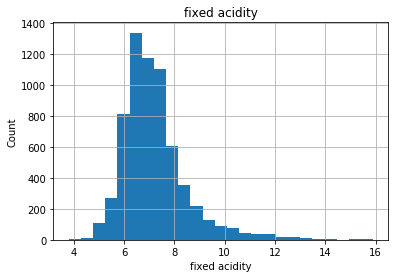

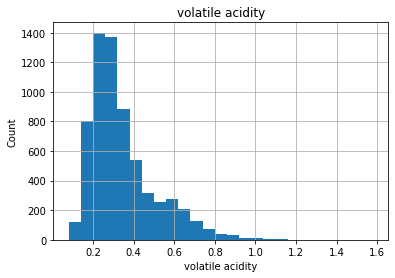

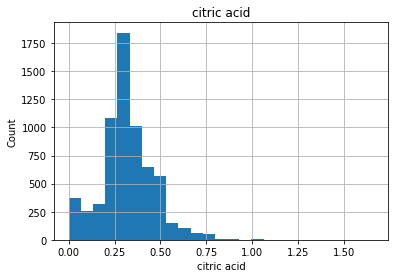

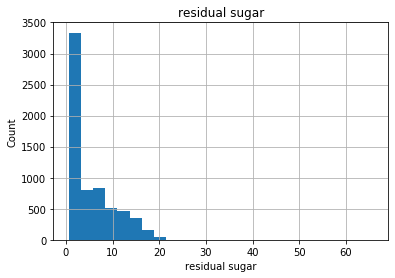

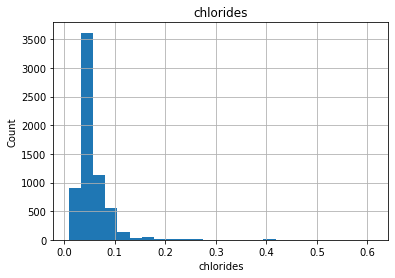

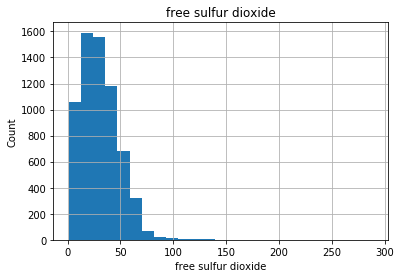

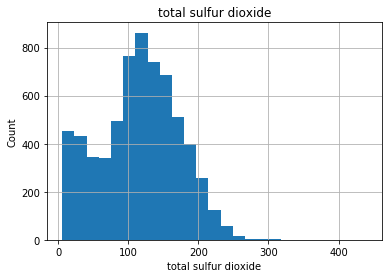

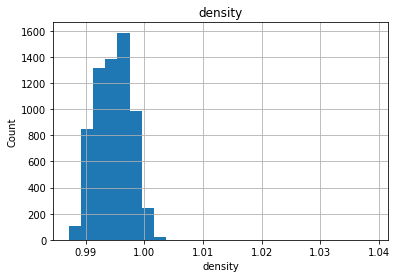

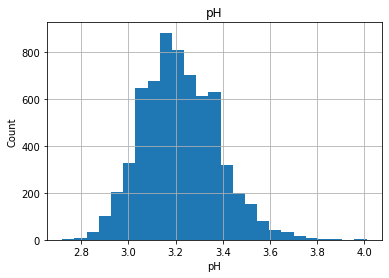

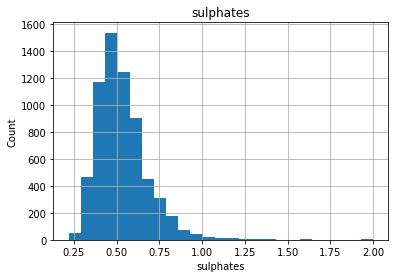

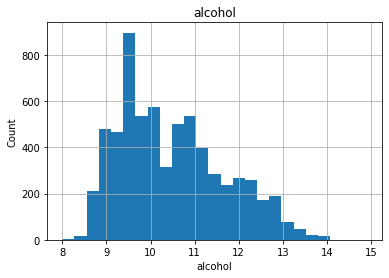

In [7]:
cols=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide',
      'total sulfur dioxide','density','pH','sulphates','alcohol']
for feature in cols:
    wine[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

### и оценок вина

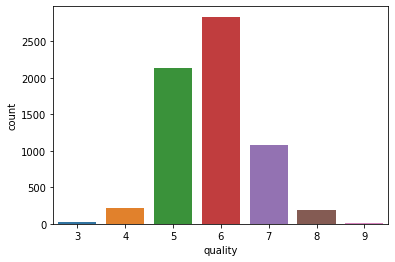

In [8]:
sns.countplot(wine['quality'])

### Тип вина задан в виде категориальной переменной, и выше не рассмотрено влияние этого параметра, посмотрим, как разделены белое и красное вино

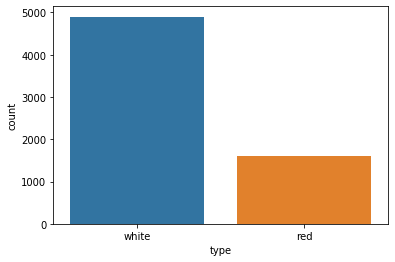

In [9]:
sns.countplot(wine['type'])

Белое вино сильно популярнее красного. Воспользуемся LabelEncoder для перевода из категориальных переменных в числовые и построем тепловую карту для оценки корреляции признаков

In [10]:
#Data transforamation
label = LabelEncoder()
dicts = {}

label.fit(wine.type.drop_duplicates())
dicts['type'] = list(label.classes_)
wine.type = label.transform(wine.type)

# test data
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


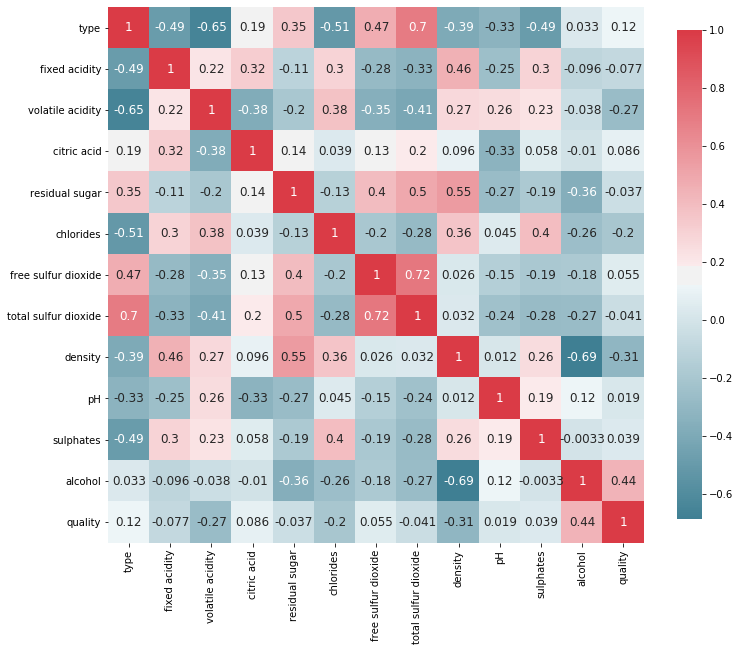

In [11]:
plot_correlation_map( wine )

С оценкой вина очень связаны признаки alcohol, density,chlorides, volatile acidity, type. Поскольку люди предпочитают белое вино, и переменная сильно не влияет на на категорию, то type не учитываем. Ниже приведен рисунок

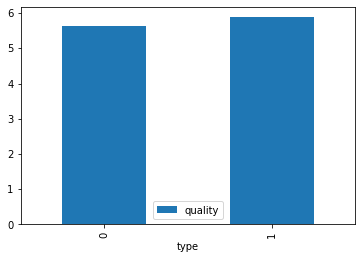

In [12]:
wine.pivot_table('quality', 'type').plot(kind='bar', stacked=True)

# 3. Data Preparation

## 3.1 Заполнить пропущенные значения в переменных
Выберем заполнеие пропущенных значений средними только для "важных" переменных

In [13]:
wine.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [14]:
# Fill missing values
wine[ 'chlorides' ] = wine.chlorides.fillna( wine.chlorides.mean() )
wine = wine.rename(columns={'volatile acidity': 'volatile_acidity'})
wine[ 'volatile_acidity' ] = wine.chlorides.fillna( wine.volatile_acidity.mean() )
wine.head()
wine.isnull().sum()

type                     0
fixed acidity           10
volatile_acidity         0
citric acid              3
residual sugar           2
chlorides                0
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

## 3.2 Подготовка финального датасета для моделирования

### 3.2.1 Variable selection
Выбираем признаки для формирования итогового датасет. У нас доступны признаки:

1. volatile acidity

2. alcohol
3. density
4. chlorides

In [15]:
# features for a model
#features = ['type', 'alcohol', 'density', 'chlorides']
features = ['alcohol', 'density', 'chlorides','volatile_acidity', 'type']
X = pd.get_dummies(wine[features])

# target
y = wine['quality']


train_X , valid_X , train_y , valid_y = train_test_split( X , y , train_size = 0.8 )
print (wine.shape , train_X.shape , valid_X.shape , train_y.shape , valid_y.shape , X.shape, y.shape)

(6497, 13) (5197, 5) (1300, 5) (5197,) (1300,) (6497, 5) (6497,)


### 3.2.2 Важность признаков
Оцениваем наиболее важные признаки, чтобы сделать прогноз. Как и предполагалось ранее, тип вина (красное или белое) можно отбросить

0.9930729266884741


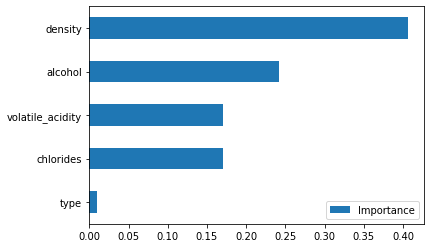

In [20]:
plot_variable_importance(train_X, train_y)

In [21]:
features = ['alcohol', 'density', 'chlorides','volatile_acidity']
X = pd.get_dummies(wine[features])
train_X , valid_X , train_y , valid_y = train_test_split( X , y , train_size = 0.8 )

# 4. Моделирование
Теперь мы выберем модель, которую хотели бы попробовать. Используем обучающий набор данных для обучения модели и затем проверим ее с помощью тестового набора.

## 4.1 Выбор модели
Попробуем использовать линейные модели
1. LR - линейная регрессия
2. regr - Регрессия случайный лес

In [22]:
LR =  LinearRegression()
X, y = make_regression(n_features=4, n_informative=2, random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0)

и модели классификации
1. SVCc - классификация опорных векторов
2. DTC - дерево решений
3. RF - случайный лес
4. KNB - метод ближайших соседей

In [23]:
SVCc=SVC()
DTC=DecisionTreeClassifier()
RF = RandomForestClassifier()
KNB=KNeighborsClassifier()

## 4.2 Обучение моделей

In [24]:
LR.fit( train_X , train_y )
regr.fit(train_X , train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [25]:
SVCc.fit( train_X , train_y )
DTC.fit( train_X , train_y )
RF.fit( train_X , train_y )
KNB.fit( train_X , train_y )

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

# 5. Оценка
Оценим 7 решений на тестовой выборке

In [26]:
# Score the model
print ("Модели регрессии")
print ("Линейная регрессия:" , "на обучающей выборке - ", LR.score( train_X , train_y ),", на тестовой выборке - ", LR.score( valid_X , valid_y ))
print ("Регрессия, случайный лес:" , "на обучающей выборке - ", regr.score( train_X , train_y ),", на тестовой выборке - ", regr.score( valid_X , valid_y ))

Модели регрессии
Линейная регрессия: на обучающей выборке -  0.21207386986244747 , на тестовой выборке -  0.1801623791875141
Регрессия, случайный лес: на обучающей выборке -  0.21536204994604724 , на тестовой выборке -  0.18651319835142444


Модели регрессии плохо сработали

In [27]:
# Score the model
print ("Модели классификации")
print ("Классификация опорных векторов:" , "на обучающей выборке - ", SVCc.score( train_X , train_y ),", на тестовой выборке - ", SVCc.score( valid_X , valid_y ))
print ("Деревья решений:" , "на обучающей выборке - ", DTC.score( train_X , train_y ),", на тестовой выборке - ", DTC.score( valid_X , valid_y ))
print ("Случайный лес, классификация:" , "на обучающей выборке - ", RF.score( train_X , train_y ),", на тестовой выборке - ", RF.score( valid_X , valid_y ))
print ("Метод ближайших соседей:" , "на обучающей выборке - ", KNB.score( train_X , train_y ),", на тестовой выборке - ",KNB.score( valid_X , valid_y ))

Модели классификации
Классификация опорных векторов: на обучающей выборке -  0.5037521647104098 , на тестовой выборке -  0.4946153846153846
Деревья решений: на обучающей выборке -  0.9930729266884741 , на тестовой выборке -  0.5684615384615385
Случайный лес, классификация: на обучающей выборке -  0.9930729266884741 , на тестовой выборке -  0.6061538461538462
Метод ближайших соседей: на обучающей выборке -  0.6678853184529536 , на тестовой выборке -  0.49230769230769234


## Лучше всего справился случайный лес, оценка - 60%  тестовой выборке